In [31]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Input
from tensorflow.keras.layers import Flatten, Dense, Reshape, Conv2D, MaxPooling2D, BatchNormalization, Conv2DTranspose, Cropping2D
from tensorflow.keras.models import Model

### Part a) Train an autoencoder to be able to produce noise-free images. Training Autoencoder on MNIST dataset

In [2]:
# Load MNIST data to train autoencoder
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize to [0, 1] and reshape
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train shape:", x_train.shape)

Train shape: (60000, 28, 28, 1)


### Add Gaussian Noise to generate noisy image

In [4]:
# add gaussian noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip to [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

### Define the Autoencoder

In [6]:
# define fully connected autoencoder
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(32, activation='relu')(x)

x = Dense(64, activation='relu')(encoded)
x = Dense(128, activation='relu')(x)
x = Dense(28*28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x)

fc_autoencoder = Model(input_img, decoded)

In [7]:
fc_autoencoder.compile(optimizer='adam', loss='mse')
fc_autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = fc_autoencoder.fit(
    x_train_noisy, x_train,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0775 - val_loss: 0.0357
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0341 - val_loss: 0.0299
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0295 - val_loss: 0.0271
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0268 - val_loss: 0.0253
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0250 - val_loss: 0.0240
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0239 - val_loss: 0.0232
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0230 - val_loss: 0.0224
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0222 - val_loss: 0.0217
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0216 - val_loss: 0.0211
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0211 - val_loss: 0.0209
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0206 - val_loss: 0.0205
Epoch 12/100
469/469 ━━━━━━━━━━━━━━━━━━━━

### Loss Curve

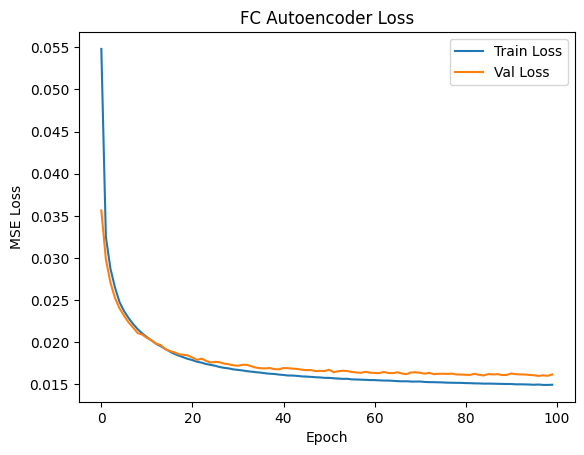

In [9]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('FC Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

### Part b) Testing trained autoencoder on unseen data

In [10]:
# generate new set of noisy test images (unseen during training)
noise_factor = 0.5
x_test_noisy_new = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy_new = np.clip(x_test_noisy_new, 0., 1.)

In [11]:
# predict on the new noisy test images
decoded_imgs = fc_autoencoder.predict(x_test_noisy_new[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


### Output

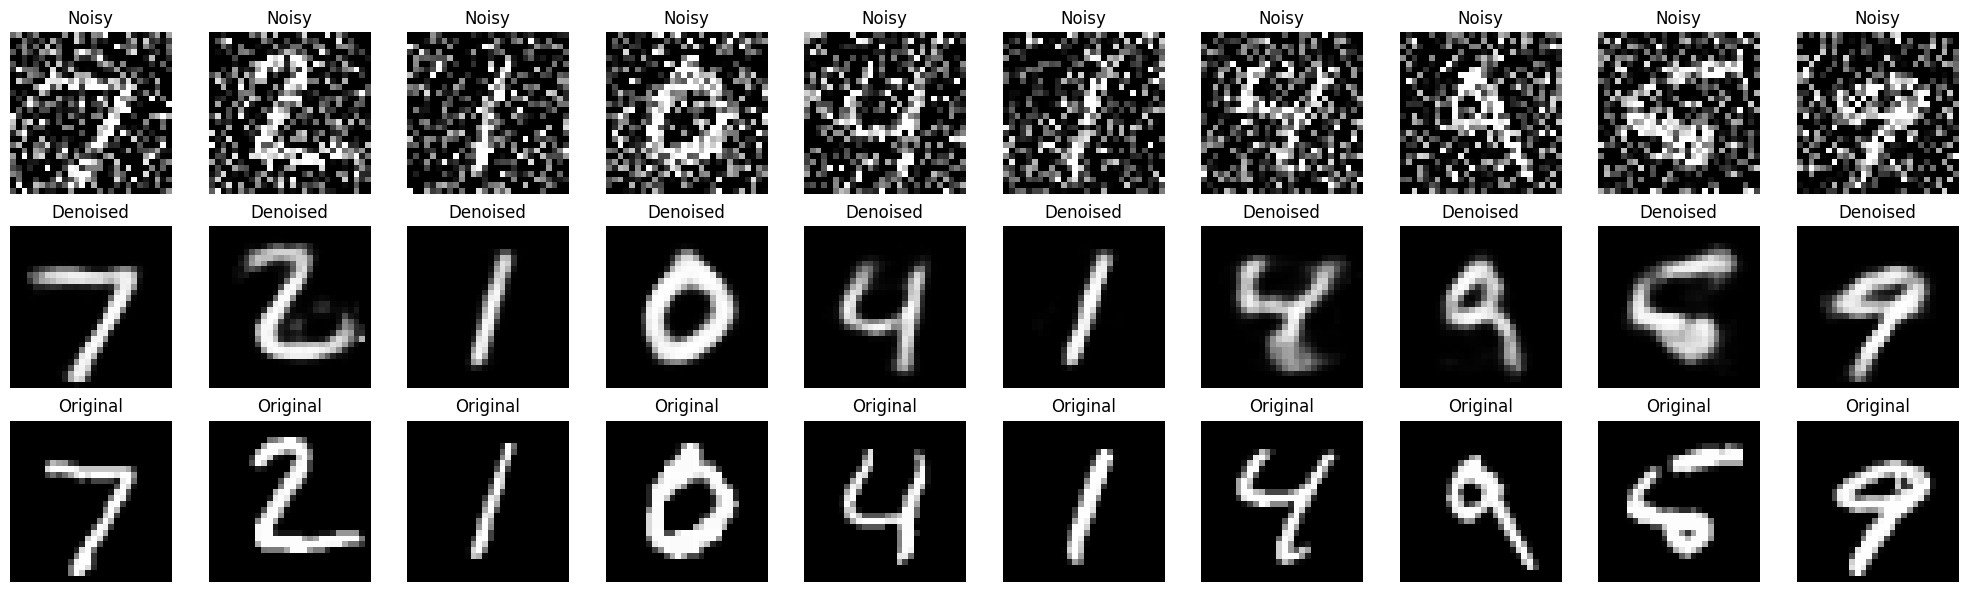

In [12]:
# display reconstructed images and their noisy input counterparts along with original images

n = 10  # number of images to display
plt.figure(figsize=(20, 6))

for i in range(n):
    # Row 1: Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy_new[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Row 2: Denoised output
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # Row 3: original clean image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Part c) Convolutional Autoencoder (CAE)

In [32]:
# define CAE architecture

input_img = tf.keras.Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same')(encoded)
x = BatchNormalization()(x)

x = Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
x = BatchNormalization()(x)

x = Cropping2D(((2, 2), (2, 2)))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

conv_autoencoder = Model(input_img, decoded)

In [33]:
conv_autoencoder.compile(optimizer='adam', loss='mse')
conv_autoencoder.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 8, 8, 128)      │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_10             │ (None, 16, 16, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_11             │ (None, 32, 32, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping2d (Cropping2D)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,593 (1.28 MB)

 Trainable params: 333,697 (1.27 MB)

 Non-trainable params: 896 (3.50 KB)

In [35]:
history_cae = conv_autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 126ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 127ms/step - loss: 0.0105 - val_loss: 0.0106
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 128ms/step - loss: 0.0102 - val_loss: 0.0103
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 131ms/step - loss: 0.0099 - val_loss: 0.0103
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 138ms/step - loss: 0.0098 - val_loss: 0.0101
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 139ms/step - loss: 0.0096 - val_loss: 0.0109
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 138ms/step - loss: 0.0094 - val_loss: 0.0100
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 139ms/step - loss: 0.0093 - val_loss: 0.0100
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 139ms/step - loss: 0.0092 - val_loss: 0.0104
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 141ms/step - loss: 0.0091 - val_loss: 0.0099


### Loss Curve

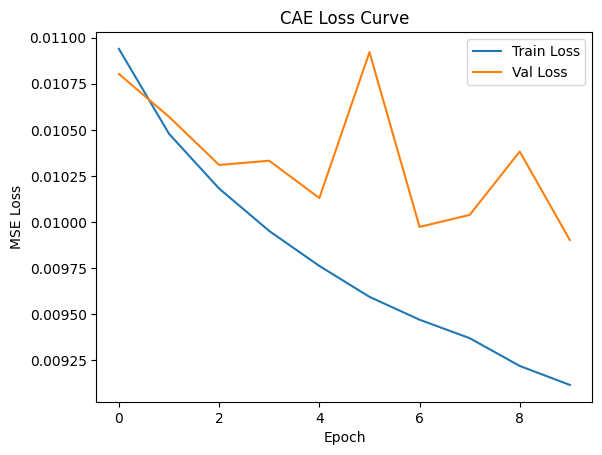

In [36]:
plt.plot(history_cae.history['loss'], label='Train Loss')
plt.plot(history_cae.history['val_loss'], label='Val Loss')
plt.title('CAE Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [37]:
decoded_imgs_cae = conv_autoencoder.predict(x_test_noisy[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


### Output

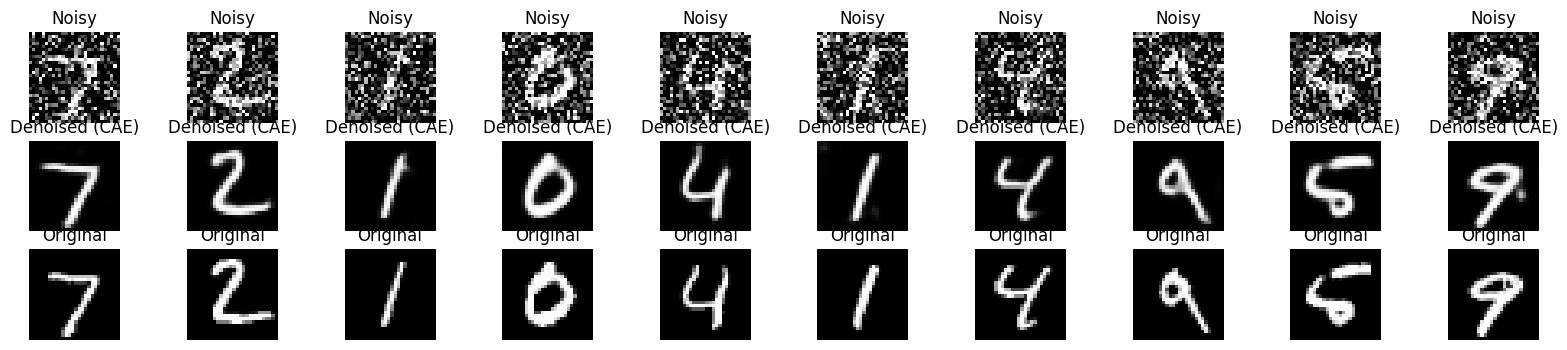

In [38]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Reconstructed (CAE)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs_cae[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised (CAE)")
    plt.axis('off')

    # Original
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
plt.show()